## 1) Setup & Library Imports
We begin by importing all necessary libraries for data manipulation and visualization.

In [1]:
# 1) IMPORT LIBRARIES
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 2) Data Loading
Load the dataset from CSV. Update the path if your file is stored elsewhere. Then, inspect the first few rows to understand its structure.

In [2]:
# 2) LOAD DATA
DATA_PATH = '/content/sreya-supply_chain_data.csv'
supply_data = pd.read_csv(DATA_PATH)

In [3]:
# Display basic info and preview
print('Dataset shape:', supply_data.shape)
display(supply_data.head())

Dataset shape: (100, 24)


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


## 3) Data Cleaning
### Remove Duplicates:
Drop any duplicate records to avoid skewed analysis.
### Handle Missing Values:
For numeric columns, fill missing entries with the column mean. This keeps the dataset complete without introducing bias.

In [4]:
# Drop duplicates
initial_count = len(supply_data)
supply_data.drop_duplicates(inplace=True)
print(f"Dropped {initial_count - len(supply_data)} duplicate rows.")

Dropped 0 duplicate rows.


In [5]:
# Fill missing numeric values with mean
supply_data.fillna(supply_data.mean(numeric_only=True), inplace=True)
print("Missing values after fill:", supply_data.isna().sum().sum())

Missing values after fill: 0


## 4) Feature Engineering
Creating new metrics to enrich analysis. How much revenue each sale generates (Price × Number sold).

In [6]:
# 4) FEATURE ENGINEERING
supply_data['Sales'] = supply_data['Price'] * supply_data['Number of products sold']
print("Sample Sales values:")
display(supply_data[['Price','Number of products sold','Sales']].head())

Sample Sales values:


,Price,Number of products sold,Sales
0,69.808006,802,55986.020445
1,14.843523,736,10924.833130
2,11.319683,8,90.557466
3,61.163343,83,5076.557470
4,4.805496,871,4185.587048


## 5) Exploratory Analysis: Sales Trends
We will look at sales distribution by product type and by customer demographics to identify top categories.

Total sales per product type:
Product type
cosmetics    6.005805e+05
haircare     6.328962e+05
skincare     1.052073e+06
Name: Sales, dtype: float64


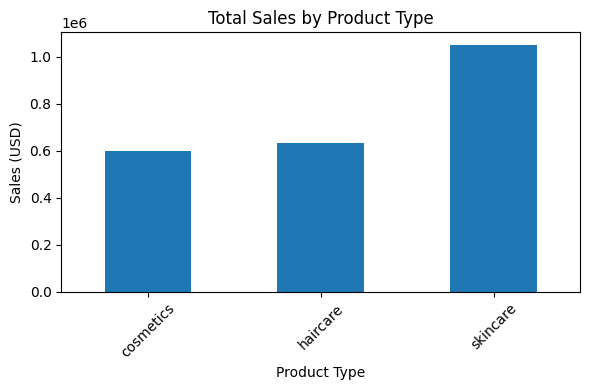

In [7]:
# Sales by Product Type
sales_by_product = supply_data.groupby('Product type')['Sales'].sum().sort_values()
print("Total sales per product type:")
print(sales_by_product)
plt.figure(figsize=(6,4))
sales_by_product.plot(kind='bar')
plt.title('Total Sales by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Total sales per demographic group:
Customer demographics
Non-binary    476206.545654
Male          487686.101811
Female        488298.612847
Unknown       833358.704367
Name: Sales, dtype: float64


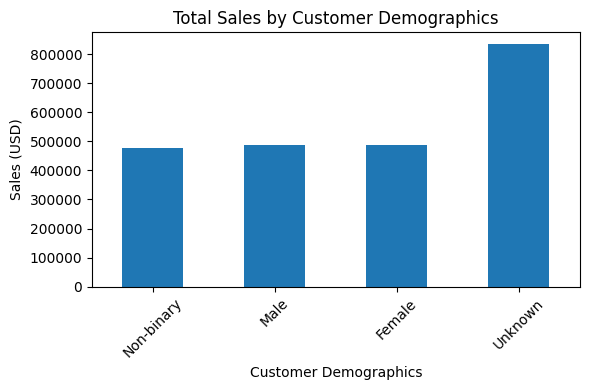

In [8]:
# Sales by Customer Demographics
sales_by_demo = supply_data.groupby('Customer demographics')['Sales'].sum().sort_values()
print("Total sales per demographic group:")
print(sales_by_demo)
plt.figure(figsize=(6,4))
sales_by_demo.plot(kind='bar')
plt.title('Total Sales by Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Sales (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 6) Inventory Analysis
Analyze how the company manages inventory, focusing on lead times and stock levels.

Average lead time (days) per product type:
Product type
cosmetics    15.384615
haircare     15.529412
skincare     16.700000
Name: Lead times, dtype: float64


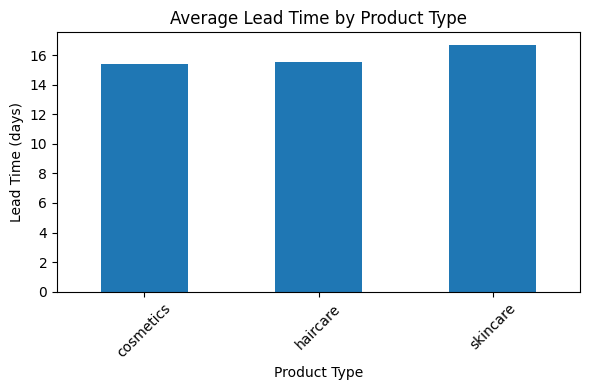

In [9]:
# Average Lead Time by Product Type
mean_lead_time = supply_data.groupby('Product type')['Lead times'].mean()
print("Average lead time (days) per product type:")
print(mean_lead_time)
plt.figure(figsize=(6,4))
mean_lead_time.plot(kind='bar')
plt.title('Average Lead Time by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Lead Time (days)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Average stock levels per product type:
Product type
skincare     40.200000
haircare     48.352941
cosmetics    58.653846
Name: Stock levels, dtype: float64


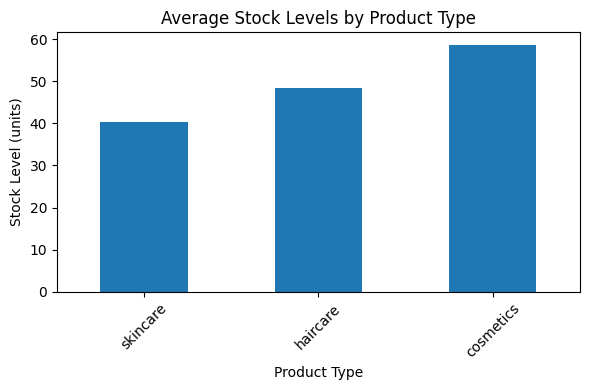

In [10]:
# Average Stock Levels by Product Type
avg_stock = supply_data.groupby('Product type')['Stock levels'].mean().sort_values()
print("Average stock levels per product type:")
print(avg_stock)
plt.figure(figsize=(6,4))
avg_stock.plot(kind='bar')
plt.title('Average Stock Levels by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Stock Level (units)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 7) Defect Rate Analysis
Evaluate product quality by calculating the defect rate by product and by transportation mode.

Defect rate (%) per product type:
Product type
cosmetics    1.919287
haircare     2.483150
skincare     2.334681
Name: Defect rates, dtype: float64


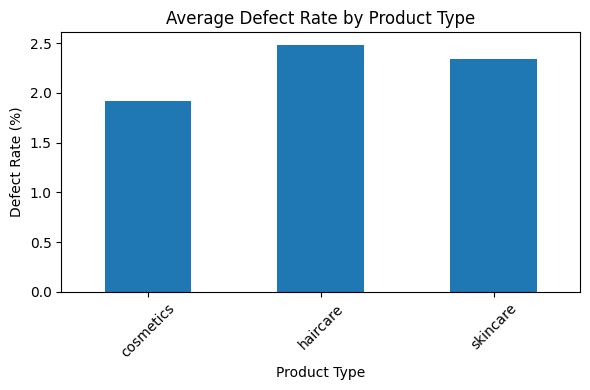

In [11]:
#  Defect Rate by Product Type
defect_by_product = supply_data.groupby('Product type')['Defect rates'].mean()
print("Defect rate (%) per product type:")
print(defect_by_product)
plt.figure(figsize=(6,4))
defect_by_product.plot(kind='bar')
plt.title('Average Defect Rate by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Defect Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Defect rate (%) per transport mode:
Transportation modes
Air     1.823924
Rail    2.318814
Road    2.620938
Sea     2.315281
Name: Defect rates, dtype: float64


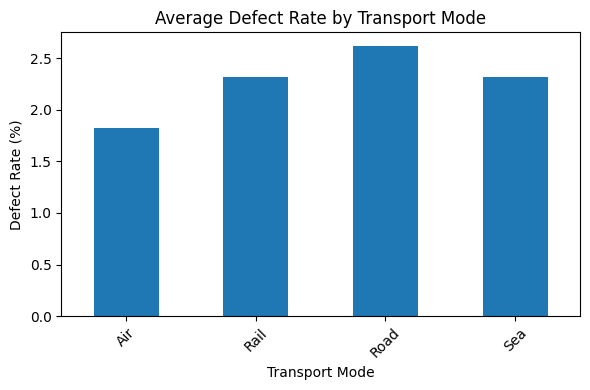

In [12]:
#  Defect Rate by Transportation Mode
defect_by_transport = supply_data.groupby('Transportation modes')['Defect rates'].mean()
print("Defect rate (%) per transport mode:")
print(defect_by_transport)
plt.figure(figsize=(6,4))
defect_by_transport.plot(kind='bar')
plt.title('Average Defect Rate by Transport Mode')
plt.xlabel('Transport Mode')
plt.ylabel('Defect Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8) Quality Inspection Results
Count how many products pass or fail inspection across product types.

Inspection result counts:


Inspection results,Fail,Pass,Pending
Product type,,,
cosmetics,10,6,10
haircare,13,6,15
skincare,13,11,16


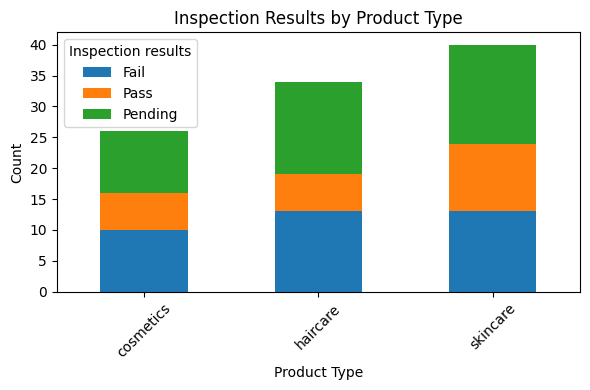

In [13]:
# QUALITY INSPECTION
inspection_counts = supply_data.groupby(['Product type', 'Inspection results']).size().unstack(fill_value=0)
print("Inspection result counts:")
display(inspection_counts)
inspection_counts.plot(kind='bar', stacked=True, figsize=(6,4))
plt.title('Inspection Results by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9) Route Cost Efficiency
Compare average shipping costs across different routes.

Average cost per route:
Routes
Route A    485.483128
Route B    595.659028
Route C    500.470985
Name: Costs, dtype: float64


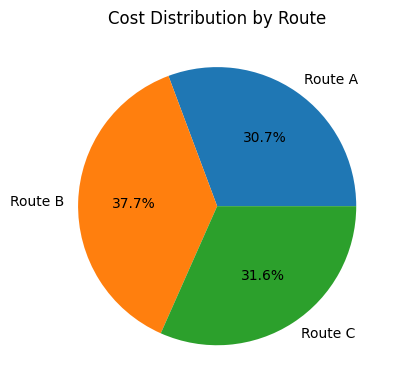

In [14]:
# ROUTE COST EFFICIENCY
avg_cost_by_route = supply_data.groupby('Routes')['Costs'].mean()
print("Average cost per route:")
print(avg_cost_by_route)
plt.figure(figsize=(6,4))
avg_cost_by_route.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Cost Distribution by Route')
plt.ylabel('')
plt.tight_layout()
plt.show()

## 10) Revenue Analysis
### 10.1 Revenue by Product Type
### 10.2 Impact of 10% Price Increase

Revenue per product type:
Product type
skincare     241628.162133
haircare     174455.390605
cosmetics    161521.265999
Name: Revenue generated, dtype: float64


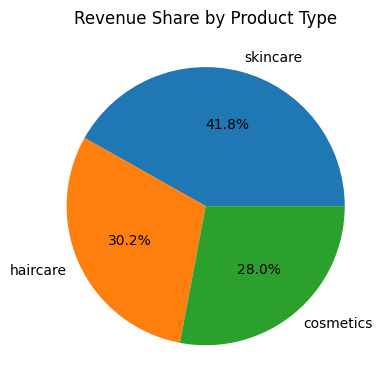

In [15]:
# Revenue by Product Type
revenue_by_product = supply_data.groupby('Product type')['Revenue generated'].sum().sort_values(ascending=False)
print("Revenue per product type:")
print(revenue_by_product)
plt.figure(figsize=(6,4))
revenue_by_product.plot(kind='pie', autopct='%1.1f%%', legend=False)
plt.title('Revenue Share by Product Type')
plt.ylabel('')
plt.tight_layout()
plt.show()

Original revenue: $577,604.82
Revenue after +10% price: $2,514,104.96
Increase amount: $1,936,500.14


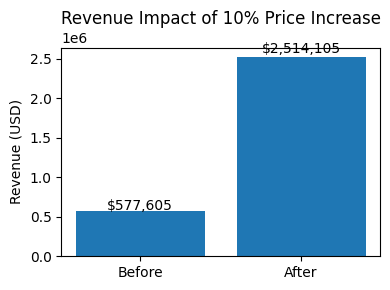

In [16]:
# Impact of 10% Price Increase
original_rev = supply_data['Revenue generated'].sum()
new_rev = (supply_data['Price'] * 1.10 * supply_data['Number of products sold']).sum()
delta = new_rev - original_rev
print(f"Original revenue: ${original_rev:,.2f}")
print(f"Revenue after +10% price: ${new_rev:,.2f}")
print(f"Increase amount: ${delta:,.2f}")

plt.figure(figsize=(4,3))
plt.bar(['Before','After'], [original_rev, new_rev])
plt.title('Revenue Impact of 10% Price Increase')
plt.ylabel('Revenue (USD)')
for i, val in enumerate([original_rev, new_rev]):
    plt.text(i, val*1.02, f"${val:,.0f}", ha='center')
plt.tight_layout()
plt.show()

## Conclusion
This analysis covered cleaning, feature engineering, and multiple facets of the supply chain including sales trends, inventory health, product quality, shipping efficiency, and revenue sensitivity.
